# International Conflict Over Time
### A Set of Visualizations of the UCDP-Prio Conflict Dataset 
#### by Emily Crawford

This project is an exploration of armed conflict over time between nations and sub-national actors, such as rebel groups. As someone who has an interest in International relations, it was interesting to explore which regions of the world experience the most frequent conflicts. This dataset does not give the whole picture, there are metrics missing such as total deaths per conflict, which could give more clarity to the data. However, this is a look at war over the decades. 

Find the dataset at the link here: https://ucdp.uu.se/downloads/index.html#armedconflict

Our first visualization shows the number of wars per country since the end of World War II. In this dataset, wars are armed conflicts with at least 1,000 battle-related deaths in a given year. Each year may have several conflicts, as the actors participating may change. 

On the right, we can interact with the map. The darker the color of the country, the more wars it has experienced in the past couple of decades. Countries that are gray do not have any recorded conflicts in this dataset. Scroll over each country to see the number of wars in total. Click on each country to change the bar graph on the right. This bar graph shows the number of conflicts per year. Years with a 1 had a conflict, but the number of deaths was under 1,000. Years with a 2 had a war, where the number of deaths exceeded 1,000. Years with a 3 had one small conflict and one war, while years with a 4 had two separate wars in the same year. Years with 0 did not experience conflict.

Check out the top for the name of the country last clicked - this is the country whose data is displayed in the bar graph on the right! 

In [231]:
myDashboard

## Conflicts vs Wars Through the Years

Our second visualization looks at the number of conflicts in total over the years. The yellow trend shows the number of conflicts globally each year over time. The blue line then shows the number of wars (conflicts with greater than 1,000 deaths) per year. We can see that over time, the number of conflicts seems to climb, as do the number of wars. It seems that over the years, there's not many years with low levels of conflict or death.

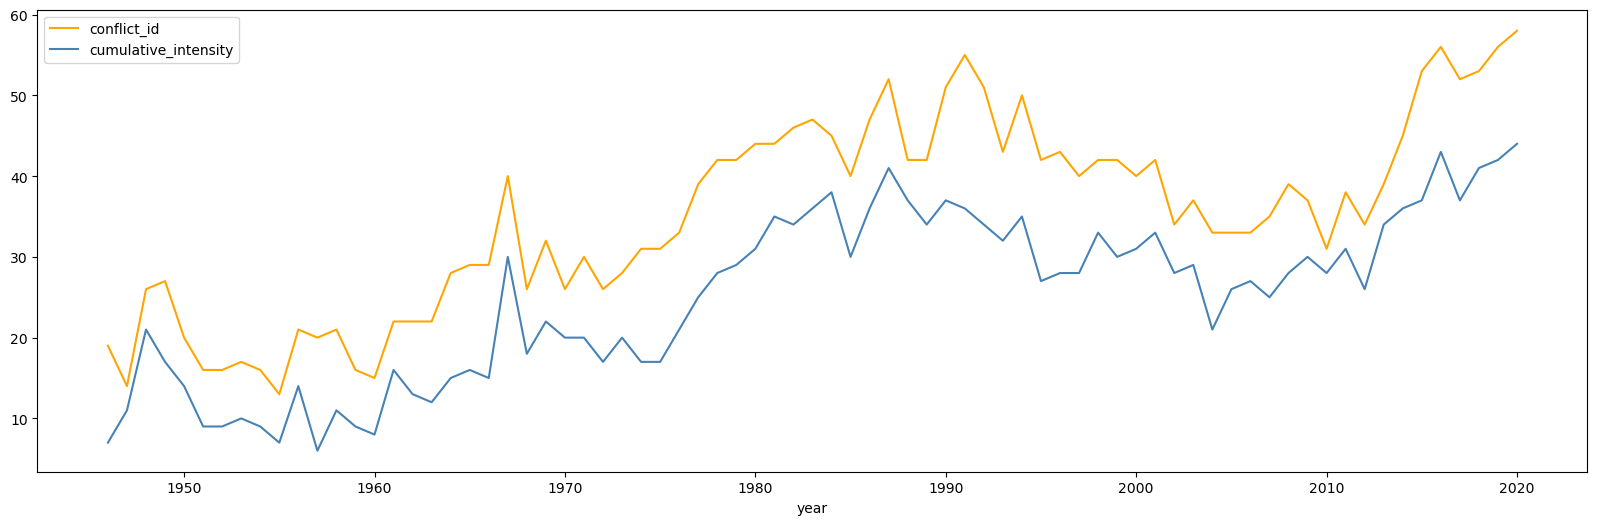

In [218]:
df2 = conflictModified.groupby("year").count()
df3 = conflictModified.groupby("year").sum()

fig, axes = plt.subplots(figsize=(20,6))

df2.plot.line(y="conflict_id", rot=45, figsize=(20,6), ax=axes, color="orange")
df3.plot.line(y="cumulative_intensity", ax=axes, color="steelblue")
plt.show()

## Types of Conflict Over Time

In our last visualization, we are looking at the types of conflict. Not all wars are created equal. In this dataset, each conflict is split into one of four types, and the y-axis represents the number of conflicts for each year.

The first type are extrasystemic conflicts, shown in yellow. Extrasystemic conflicts occur when a country is fighting another group outside of their own national borders. The opposing side is not another nation, and the country is fighting to keep control of an area outside of their borders. Interestingly, we see this type of conflict die out in the mid-1970's.

The second type is interstate conflicts, shown in red. Interstate conflicts occur between two countries. The number of conflicts of this type has stayed fairly steady over the years, and there have been less interstate conflicts in the past two decades.

The third type of conflict is an intrastate conflict, shown in blue. Intrastate conflicts occur when a country is fighting a rebel group inside of their own territory. This can be a civil war, or simply a rebel group attack. The amount of intrastate conflicts has grown in the 21st century. 

The last type are internationalized intrastate conflict, shown in green. This type of conflict is the same as an intrastate conflict, with a state fighting one or more rebel groups for control. However, there is the involvement of  foriegn troops on either side. In the graph below, we see a lot of this type of conflict, when one country comes to the other's aid. I did not expect there to be so much foriegn involvement in most wars. 
 

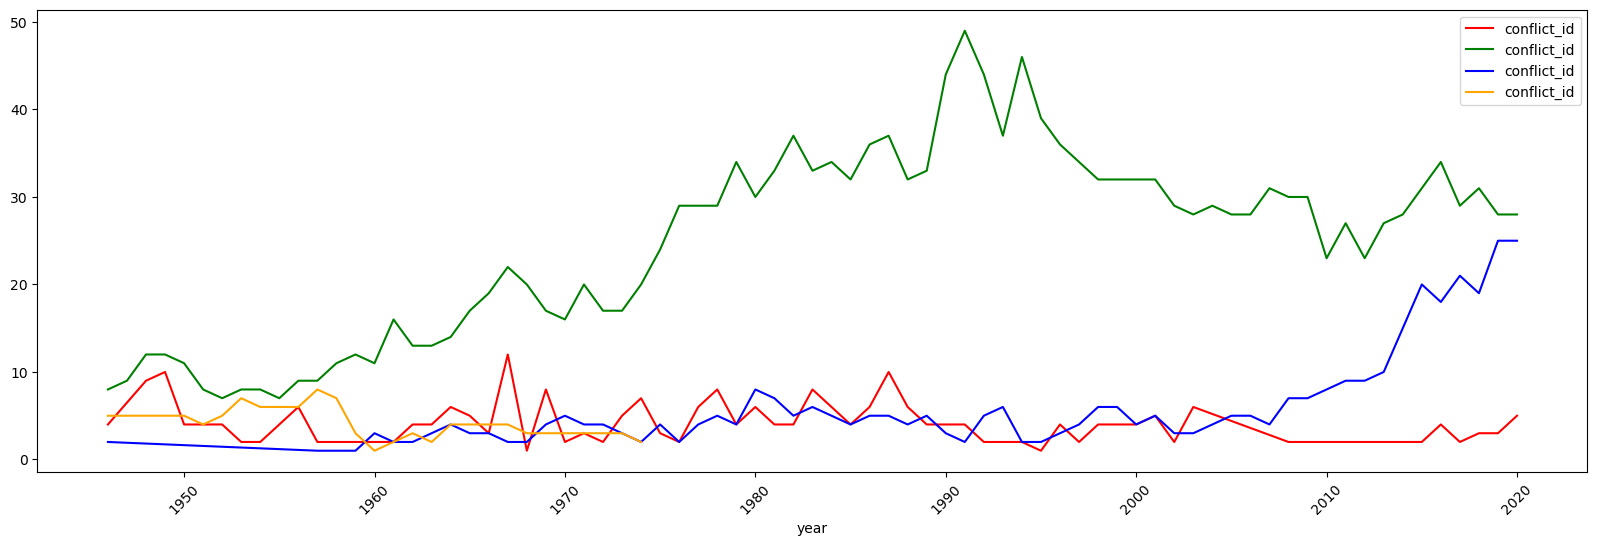

In [222]:
types = conflictModified.groupby(['type_of_conflict', 'year']).count()
one = conflictModified[conflictModified["type_of_conflict"] == 1].groupby('year').count()
two = conflictModified[conflictModified["type_of_conflict"] == 2].groupby('year').count()
three = conflictModified[conflictModified["type_of_conflict"] == 3].groupby('year').count()
four = conflictModified[conflictModified["type_of_conflict"] == 4].groupby('year').count()
fig, axis = plt.subplots(figsize=(20,6))

two.plot.line(y="conflict_id", rot=45, figsize=(20,6), ax=axis, color="red")
three.plot.line(y="conflict_id", rot=45, figsize=(20,6), ax=axis, color="green")
four.plot.line(y="conflict_id", rot=45, figsize=(20,6), ax=axis, color="blue")
one.plot.line(y="conflict_id", rot=45, figsize=(20,6), ax=axis, color="orange")

plt.show()


### Look below to see the datasets!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
original = pd.read_csv("ucdp-prio-acd-211.csv")
conflictModified = pd.read_csv("https://raw.githubusercontent.com/emilycraw4d/emilycraw4d.github.io/master/conflictModified.csv")

In [189]:
df = conflictModified.groupby("location").sum()
df[''] = range(0, len(df))
df['location'] = df.index
df = df.set_index('')

df

,conflict_id,incompatibility,year,intensity_level,cumulative_intensity,type_of_conflict,start_prec,start_prec2,ep_end,ep_end_prec,region,version,latitude,longitude,location
,,,,,,,,,,,,,,,
0,110264,96,102042,96,49,186,94,51,2,0.0,153,1076.1,1722.168332,3378.164209,Afghanistan
1,215,1,1946,1,0,2,1,1,1,0.0,1,21.1,33.258882,-86.829534,Albania
2,27407,69,79746,53,35,102,40,49,4,0.0,160,844.0,1120.001088,119.999300,Algeria
3,18376,82,111290,81,40,159,56,108,9,0.0,224,1181.6,2665.262320,790.975360,Angola
4,1828,13,13802,7,2,20,7,11,4,0.0,35,147.7,-244.975474,-454.770972,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,319,2,1972,1,0,3,1,3,1,0.0,5,21.1,-32.875555,-56.020153,Uruguay
115,1245,6,6003,3,0,10,3,3,2,0.0,9,63.3,123.971190,191.858429,Uzbekistan
116,11981,43,84563,74,38,90,107,156,8,0.0,129,907.3,571.487316,4662.339986,Viet Nam


In [228]:
df2

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version,alpha2Code,latitude,longitude
year,,,,,,,,,,,,,,,,,,,,,
1946,19,19,19,19,0,19,19,2,19,15,...,19,0,4,2,19,19,19,19,19,19
1947,14,14,14,14,0,14,14,0,14,9,...,14,0,0,0,14,14,14,14,14,14
1948,26,26,26,26,0,26,26,0,26,18,...,26,0,9,0,26,26,26,26,26,26
1949,27,27,27,27,1,27,27,0,27,21,...,27,1,10,0,27,27,27,27,27,27
1950,20,20,20,20,3,20,20,2,20,17,...,20,3,4,2,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,56,56,56,56,15,56,56,3,56,34,...,56,15,4,3,56,56,56,56,56,56
2017,52,52,52,52,18,52,52,3,52,32,...,52,18,2,3,52,52,52,52,52,52
2018,53,53,53,53,17,53,53,2,53,28,...,53,17,3,2,53,53,53,53,53,53


In [229]:
df3

,conflict_id,incompatibility,intensity_level,cumulative_intensity,type_of_conflict,start_prec,start_prec2,ep_end,ep_end_prec,region,version,latitude,longitude
year,,,,,,,,,,,,,
1946,3965,23,26,7,45,59,66,9,0.0,40,400.9,614.554285,671.939958
1947,14618,19,24,11,32,48,52,3,0.0,37,295.4,310.211258,845.347406
1948,17348,34,45,21,59,78,81,8,0.0,65,548.6,705.043128,1631.358754
1949,6002,37,36,17,61,72,78,10,0.0,72,569.7,670.930611,1986.226571
1950,4503,27,29,14,46,55,58,7,0.0,59,422.0,462.910098,1735.387262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,281849,80,68,43,182,108,81,15,0.0,178,1181.6,1280.330708,2313.279780
2017,318604,72,62,37,175,87,62,12,0.0,160,1097.2,1212.434280,2369.701145
2018,281299,80,59,41,175,99,60,8,0.0,166,1118.3,1083.733284,2426.434409


In [21]:
years = conflictModified.groupby(['location', 'year']).sum()
years

conflict_id  incompatibility  intensity_level  \
location    year                                                  
Afghanistan 1978          333                2                2   
            1979          764                4                3   
            1980          333                2                2   
            1981          333                2                2   
            1982          333                2                2   
...                       ...              ...              ...   
Zimbabwe    1975          318                2                1   
            1976          318                2                2   
            1977          318                2                2   
            1978          318                2                2   
            1979          318                2                2   

                  cumulative_intensity  type_of_conflict  start_prec  \
location    year                                                       
Afghanistan 1978                     1                 3           2   
            1979                     1                 5           3   
            1980                     1                 4           2   
            1981                     1                 4           2   
            1982                     1                 4           2   
...                                ...               ...         ...   
Zimbabwe    1975                     0                 4           1   
            1976                     1                 3           1   
            1977                     1                 3           1   
            1978                     1                 3           1   
            1979                     1                 3           1   

                  start_prec2  ep_end  ep_end_prec  region  version  \
location    year                                                      
Afghanistan 1978            1       0          0.0       3     21.1   
            1979            2       1          0.0       6     42.2   
            1980            1       0          0.0       3     21.1   
            1981            1       0          0.0       3     21.1   
            1982            1       0          0.0       3     21.1   
...                       ...     ...          ...     ...      ...   
Zimbabwe    1975            1       0          0.0       4     21.1   
            1976            1       0          0.0       4     21.1   
            1977            1       0          0.0       4     21.1   
            1978            1       0          0.0       4     21.1   
            1979            1       1          0.0       4     21.1   

                   latitude   longitude  
location    year                         
Afghanistan 1978  33.768006   66.238514  
            1979  67.536013  132.477028  
            1980  33.768006   66.238514  
            1981  33.768006   66.238514  
            1982  33.768006   66.238514  
...                     ...         ...  
Zimbabwe    1975 -18.455496   29.746841  
            1976 -18.455496   29.746841  
            1977 -18.455496   29.746841  
            1978 -18.455496   29.746841  
            1979 -18.455496   29.746841  

[1902 rows x 13 columns]

In [230]:
# code for the dashboard up above

import bqplot
from bqplot import Map, Mercator, Figure, ColorScale, ColorAxis, Mercator, Tooltip, topo_load
world_map = topo_load("map_data/WorldMap.json")


#create coloring for map 
def map_data_to_color_mapping(map_data, column="cumulative_intensity"):
    """
    Function to Map Country ID to intensity value from Conflict Dataset
    """
    name_to_id_mapping = []
    for entry in map_data: 
        name_to_id_mapping.append((entry["properties"]["name"], entry["id"]))

    name_to_id_mapping = dict(name_to_id_mapping)

    color = []
    import warnings
    warnings.filterwarnings("ignore", 'This pattern has match groups')
    for name, idx in name_to_id_mapping.items():
        score = df[df["location"].str.contains(name)][column].values
        if len(score) > 0:
            color.append((idx,score[0]))
            
    return dict(color)

mySelectedLabel = ipywidgets.Label()

#function to change the country clicked
country = "France"
def onClicked(self,target):
    country = str(target['data']['name'])
    bar.x = years.loc[country].index
    map_chart.color = map_data_to_color_mapping(world_map["objects"]["subunits"]["geometries"])
    mySelectedLabel.value = str(target['data']['name'])
    return country
mySelectedLabel.value = "Afghanistan"
map_chart = bqplot.Map(color=map_data_to_color_mapping(world_map["objects"]["subunits"]["geometries"]),
                map_data=world_map,
                colors={'default_color': 'Grey'},
                scales={'color': ColorScale(scheme='Oranges'), 'projection':Mercator()})

axes = ColorAxis(scale=ColorScale(scheme='Oranges'))
map_chart.on_element_click(onClicked)

map_chart.tooltip = Tooltip(fields=['color'], labels=["Number of Wars:"])
fig = bqplot.Figure(marks=[map_chart], axes=[axes],
       title_style={"font-weight":"bold"},
       title="Number of Wars per Country (1946 through 2020)")

# start of bar graph

years = conflictModified.groupby(['location', 'year']).sum()
# ^^ use the above so when you click on a country it changed this and then changes the graph. 
# this filters the larger dataset by country. 

x_date = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
x_ax = bqplot.Axis(scale = x_date)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')


bar = bqplot.Bars(x=years.loc["Afghanistan"].index, y=years.loc["Afghanistan"]["intensity_level"], scales={'x': x_date, 'y':
y_sc}, stroke="Black",colors=["orange"])
fig_bar = bqplot.Figure(marks = [bar], axes = [y_ax, x_ax],  title_style={"font-weight":"bold"},
       title="Conflict Intensity Per Year")


figures = ipywidgets.HBox([fig, fig_bar])
fig_bar.layout.min_width = '500px' # feel free to change for your screen
fig.layout.min_width = '700px'
myDashboard = ipywidgets.VBox([mySelectedLabel, figures]) # have label on top of fig # show